<a href="https://colab.research.google.com/github/D34dP0oL/4216_Biomedical_DS_and_AI/blob/main/Sheet2/Sheet2_FinalSubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sheet 2 - Introduction

By: Genivika Mann, Jonah Sieg, Fatemeh Salehi, Helia Salimi, Fabrice Beaumont

## Ex1 - Understanding Your Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Perform data cleaning procedures such that your final dataset is usable in the following questions

#### For the file 'processedClevelandData.csv'

In [ ]:
data = pd.read_csv("processedClevelandData.csv", sep=';', index_col = 'id')
data.head(4)

,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
id,,,,,,,,,,,,,
1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,3.0,0.0,6.0,0
2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,2.0,3.0,3.0,1
3,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.0,2.0,7.0,1
4,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.0,0.0,3.0,0


In [ ]:
### Check, if any missing values have to be filled in
data.isna().sum().sum()

0

In [ ]:
### Check, if any duplicate rows exist
nr_duplicated_rows = np.sum( data.duplicated() )
print( f'There are {nr_duplicated_rows} duplicated rows.' ) 

There are 0 duplicated rows.


In [ ]:
### There are no NaN values and duplicated rows, but we notice some '?' values. For example
data.loc[288]['ca']

'?'

In [ ]:
### identify columns having '?' value by
### listing data types of all columns
data.dtypes

Age         float64
Sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
resetecg    float64
thalach     float64
exang       float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [ ]:
### examining values present in `ca` column and `thal` column
print( 'Value counts of `ca` column ' )
print( data[ 'ca' ].value_counts() )
print( 'Value counts of `thal` column ' )
print( data[ 'thal' ].value_counts() )

### and removing rows containing ? in these two columns
data =  data[ ( data[ 'ca' ] != '?' ) ]
data = data[ ( data[ 'thal' ] != '?' ) ]

Value counts of `ca` column 
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64
Value counts of `thal` column 
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64


In [ ]:
### W.r.t. task 1.3: Column 'chol' stores the values AND the unit mg/dl as a string
### Lets remove the unit to be left with directly usable values
data['chol'] = data['chol'].map(lambda x: x.rstrip('mg/dl'))
data['chol'] = data['chol'].astype(float) ### 'int' seems reasonable too

In [ ]:
data.head(4)

,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
id,,,,,,,,,,,,,
1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,3.0,0.0,6.0,0
2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,2.0,3.0,3.0,1
3,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.0,2.0,7.0,1
4,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.0,0.0,3.0,0


#### For the file 'featureDescription.csv'

When first reading in the file, we notices some messed up separation.
We noticed, that often the delimiter ; was inside a quotationmark.
By flipping these, we get a better - but still not perfect readout.
Alternatively one could clean up the small data by hand.

In [ ]:
file_in = open("featureDescription.csv", "rt")
file_out = open("featureDescription_clean.csv", "wt")
for line in file_in:
    file_out.write(line.replace(';"', '";'))
file_in.close()
file_out.close()

features = pd.read_csv("featureDescription.csv", sep=';')

### 2. For each type of diagnosis of heart disease, find the following for the resting blood pressure:

#### Taking a look at the features reveals, that the 'diagnosis of heart disease' is given in the column 'num'

#### a. Mean

In [ ]:
### One can get the mean of the (resting) 'blood pressure' [mmHg] with: 
#data['trestbps'].mean()
### But to get it for each type of diagnosis of heart disease ('num') separately,
### group the rows with the same 'num' entry first
mean_per_heartDisease = data.groupby(['num']).mean()

In [ ]:
#mean_per_heartDisease['trestbps']
for index, row in mean_per_heartDisease.iterrows():
    print(f"Heart disease {index} has an average blood pressure of {row['trestbps']:.2f} mmHg")

Heart disease 0 has an average blood pressure of 129.18 mmHg
Heart disease 1 has an average blood pressure of 134.64 mmHg


Text(0, 0.5, 'Mean [mmHg]')

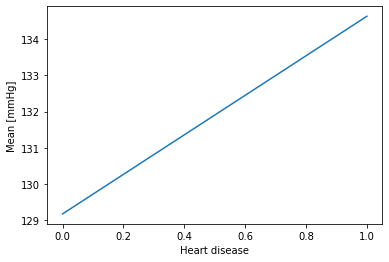

In [ ]:
mean_per_heartDisease['trestbps'].plot()
# plt.xticks(np.arange(0, 4.1, 1.0))
plt.xlabel("Heart disease")
plt.ylabel("Mean [mmHg]")

#### b. Median

In [ ]:
median_per_heartDisease = data.groupby(['num']).median()
for index, row in median_per_heartDisease.iterrows():
    print(f"Heart disease {index} has an median blood pressure of {row['trestbps']:.2f} mmHg")

Heart disease 0 has an median blood pressure of 130.00 mmHg
Heart disease 1 has an median blood pressure of 130.00 mmHg


Text(0, 0.5, 'Median [mmHg]')

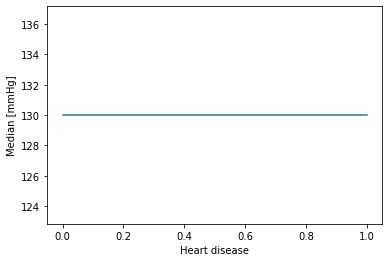

In [ ]:
median_per_heartDisease['trestbps'].plot()
# plt.xticks(np.arange(0, 4.1, 1.0))
plt.xlabel("Heart disease")
plt.ylabel("Median [mmHg]")

#### c. Standard deviation

In [ ]:
stdDev_per_heartDisease = data.groupby(['num']).std()
for index, row in stdDev_per_heartDisease.iterrows():
    print(f"Heart disease {index} has a std. dev. in blood pressure of {row['trestbps']:.2f} mmHg")

Heart disease 0 has a std. dev. in blood pressure of 16.37 mmHg
Heart disease 1 has a std. dev. in blood pressure of 18.90 mmHg


Text(0, 0.5, 'Standard deviation [mmHg]')

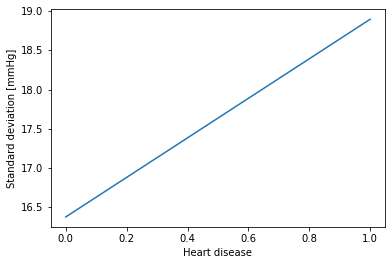

In [ ]:
stdDev_per_heartDisease['trestbps'].plot()
# plt.xticks(np.arange(0, 4.1, 1.0))
plt.xlabel("Heart disease")
plt.ylabel("Standard deviation [mmHg]")

### 3. Use Spearman's and Kendall correlation to quantify the correlation between age and the following.

In [ ]:
meta_data = [("resting blood pressure", "trestbps", "mmHg"), ("serum cholesterol level", "chol", "mg/dl"), ("maximum heart rate achieved", "thalach", "bpm")]

#### Spearman

In [ ]:
print("The Spearman's correlation between age and ... ")
for name, col, unit in meta_data:
    print(f"{name} is:\t {data.corr(method ='spearman')['Age'][col]:.3f} \t[{unit}]")

The Spearman's correlation between age and ... 
resting blood pressure is:	 0.300 	[mmHg]
serum cholesterol level is:	 0.183 	[mg/dl]
maximum heart rate achieved is:	 -0.393 	[bpm]


#### Kendall

In [ ]:
print("The Kendall's correlation between age and ... ")
for name, col, unit in meta_data:
    print(f"{name} is:\t {data.corr(method ='kendall')['Age'][col]:.3f} \t[{unit}]")

The Kendall's correlation between age and ... 
resting blood pressure is:	 0.211 	[mmHg]
serum cholesterol level is:	 0.127 	[mg/dl]
maximum heart rate achieved is:	 -0.277 	[bpm]


#### Also, which variable(s) are most correlated with age? Illustrate with heatmaps.

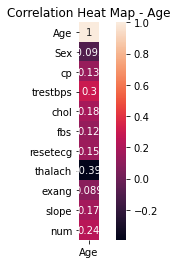

In [ ]:
data_spearman_age = pd.DataFrame(data.corr(method ='spearman')['Age'])
### Plot the heatmap and annotation on it
sns.heatmap(data_spearman_age, annot=True, square=True)
plt.title('Correlation Heat Map - Age')
plt.show()

Of course, 'Age' is perfectly correlated with 'Age'. 
Besides this, we can identiy the second highest positive correlation which has magnitude ~0.29 and is with the resting blood pressure value:

In [ ]:
### Get the second highest correlation value
second_max_corr = data.corr(method ='spearman')['Age'].sort_values()[-2]
### Get the feature name, that corresponds to this value
true_false_df = (data_spearman_age.values == second_max_corr)
second_max_feature = data_spearman_age.index[true_false_df.argmax()]

print(f"The highest non-trivial corrleation (Spearman) with the feature 'Age' is with feature")
print(f"'{second_max_feature}' and it has magnitude of approximately '{second_max_corr:.3f}'.")

The highest non-trivial corrleation (Spearman) with the feature 'Age' is with feature
'trestbps' and it has magnitude of approximately '0.300'.


In [ ]:
### Lets do the same for the least correlation
min_corr = data.corr(method ='spearman')['Age'].sort_values()[0]
### Get the feature name, that corresponds to this value
min_feature = data_spearman_age.index[(data_spearman_age.values == min_corr).argmax()]

print(f"The lowest corrleation (Spearman) with the feature 'Age' is with feature")
print(f"'{min_feature}' and it has magnitude of approximately '{min_corr:.3f}'.")

The lowest corrleation (Spearman) with the feature 'Age' is with feature
'thalach' and it has magnitude of approximately '-0.393'.


### 4. From your understanding, which of the features can be labeled as discrete random variables and which features as continuous random variables?

In [ ]:
data.head(2)

,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
id,,,,,,,,,,,,,
1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,3.0,0.0,6.0,0
2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,2.0,3.0,3.0,1


#### Let's go through them one by one:
- 'iD' has integer values and thus a DISCRETE range. It is not really a random variable though.
- 'Age' in general is a difference between time and could be understood as a continuous value. But in this databas it only takes integer values (years) and thus is DISCRETE.
- 'Sex' is clearly a DISCRETE variable by definition: 
    - 1: male,
    - 0: female
- 'cp' (chest pain type) is DISCRETE by definition: 
    - 1: typical angina, 
    - 2: atypical angina, 
    - 3: non-anginal pain, 
    - 4: asymptomatic
- 'trestbps' (resting blood pressure) is given in torr (unit of ressure, mmHg). It could be intepreted as continuous. But considering the given data which only has integer values, a DISCRETE interpretation is fine.
- 'chol' (serum cholestoral) - same as with 'trestbps' but unit mg/dl - DISCRETE
- 'fbs' (fasting blood sugar) is DISCRETE by definition:
    - 0: fasting blood sugar >= 120 mg/dl
    - 1: fasting blood sugar >  120 mg/dl
- 'resetecg' (resting electrocardiographic results) is DISCRETE by definition:
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    - showing probable or definite left ventricular hypertrophy by Estes' criteria "
- 'thalach' (maximum heart rate achieved) similar to 'trestbps'. Since it is measured in bpm (beats per minute), its values can be seen as integers and thus DISCRETE
- 'exang' (exercise induced angina) is DISCRETE by definition
    - 0: no
    - 1: yes
- 'slope' (slope of the peak exercise ST segment) is DISCRETE by definition
    - 1: upsloping
    - 2: flat
    - 3: downsloping
- 'ca' (number of major vessels colored by flourosopy) is DISCRETE by definition since it is a count (0-3)
- 'thal' is DISCRETE by definition:
    - 3: normal
    - 6: fixed defect
    - 7: reversable defect
- 'num' (diagnosis of heart disease) is DISCRETE by definition:
    - 0: angiographic disease status = <50 % diameter narrowing
    - 1: angiographic disease status = >50 % diameter narrowing

### 5. Describe the distribution for the values of the "thalach" feature? Illustrate with a plot.

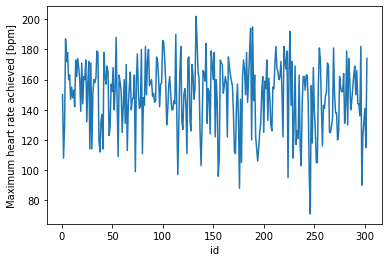

In [ ]:
data['thalach'].plot()
plt.ylabel("Maximum heart rate achieved [bpm]")
plt.show()

It seems like there is some noise in the data. Values below 100 bpm as a maximum heart rate seem unreasonable.

<AxesSubplot:ylabel='Density'>

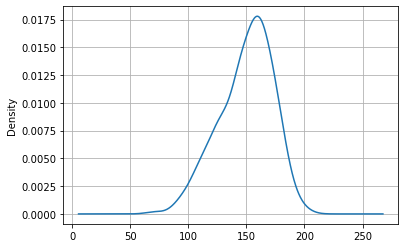

In [ ]:
data['thalach'].plot.density(grid=True)

The `Thalach` feature follows a normal distribution with its mean lying around 160-170, as shown in the density plot above.

### 6. Plot the frequency of “Sex” variable in the dataset and describe what you observe in the plot. Similarly plot and describe the 'ca' feature for the male participants.

#### "Sex"

In [ ]:
data['Sex'].value_counts()

1.0    201
0.0     96
Name: Sex, dtype: int64

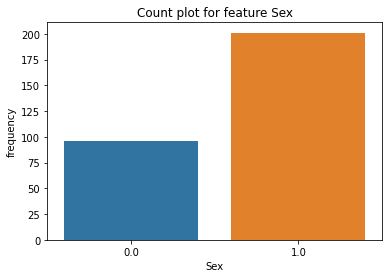

In [ ]:
# Plotting count plot for "Sex" feature in dataset
sns.countplot( data = data, x = "Sex" )
plt.title( 'Count plot for feature Sex' )
plt.xlabel( 'Sex' )
plt.ylabel( 'frequency' )
plt.show()

This means there are almost twice as much entries with value 'male' than the opposite 'female'.

## "Ca"

['0.0' '3.0' '2.0' '1.0']


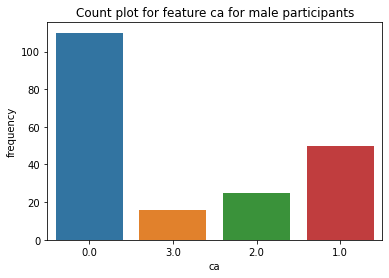

In [ ]:
# Plotting the "ca" feature for male participants

# preparing dataframe with only male participant rows
male_participants_dataset = data[ data[ 'Sex' ] == 1 ]
print( male_participants_dataset[ "ca" ].unique() )


# plotting 'ca' for male participants
sns.countplot( data = male_participants_dataset, x = "ca" )
plt.title( "Count plot for feature ca for male participants" )
plt.xlabel( "ca" )
plt.ylabel( "frequency" )
plt.show()

Observation: More than half of the male participants have 'ca' feature value of '0.0', followed by almost a quarter male participants having 'ca' equal to '1.0'. Less than 20 male participants have 'ca' feature of '3.0' 

### 7. Detect outlier patients for features "trestbps'' and "chol". Illustrate with plots.

#### "trestbps"

<AxesSubplot:xlabel='trestbps'>

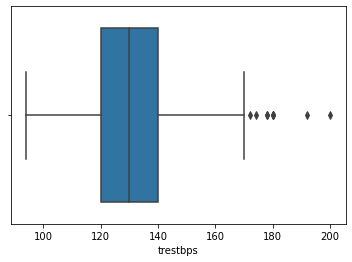

In [ ]:
### plotting box plot of 'trestbps'
sns.boxplot(x=data['trestbps'])

#### "chol"

<AxesSubplot:xlabel='chol'>

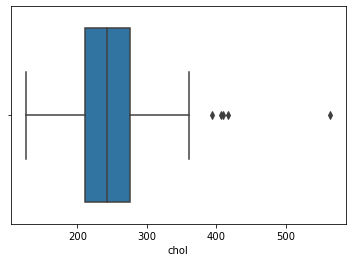

In [ ]:
### plotting box plot of 'chol'
sns.boxplot(x=data['chol'])

Outliers are visible in box plots as the points below Minimum ( $Q_1-1.5*IQR$ ) or the points above Maximum ( $Q_3+1.5*IQR$). The box plots for 'trestbps' and 'chol' shows outliers above the maximum.

- For 'trestbps', values above 170 mm Hg can be seen as outliers. And indeed - a resting blood pressure this high is quite unusual.
- For 'chol', values above 350 mg/dl can be seen as outliers.

In [ ]:
def outlierDetector( dataset, feature ):
    '''This method calculates quartiles, IQR and minimum, maximum for a feature of the dataset.
    It then returns a dataframe containing outliers of the feature
    
    Args:
        dataset - A dataset containing the feature whose outliers need to be detected.
        feature - The feature whose outliers need to be detected
        
    Return:
        outliers - A dataframe containing outliers of df
    '''
    q1 = dataset[ feature ].quantile(0.25)
    q3 = dataset[ feature ].quantile(0.75)
    iqr = q3 - q1
    minimum = q1 - 1.5 * iqr
    maximum = q3 + 1.5 * iqr
    outliers = dataset[ ( dataset[ feature ] > maximum ) | ( dataset[ feature ] < minimum ) ]
    outlier_rows = outliers.shape[ 0 ]
    print( f"The no. of outliers in feature {feature} are {outlier_rows}" )
    print( outliers, "\n" )
    
outlierDetector( data, 'trestbps' )
outlierDetector( data, 'chol' )

The no. of outliers in feature trestbps are 9
      Age  Sex   cp  trestbps   chol  fbs  resetecg  thalach  exang  slope  \
id                                                                           
15   52.0  1.0  3.0     172.0  199.0  1.0       0.0    162.0    0.0    1.0   
84   68.0  1.0  3.0     180.0  274.0  1.0       2.0    150.0    1.0    2.0   
127  56.0  0.0  4.0     200.0  288.0  1.0       2.0    133.0    1.0    3.0   
173  59.0  0.0  4.0     174.0  249.0  0.0       0.0    143.0    1.0    2.0   
184  59.0  1.0  1.0     178.0  270.0  0.0       2.0    145.0    0.0    3.0   
189  54.0  1.0  2.0     192.0  283.0  0.0       2.0    195.0    0.0    1.0   
202  64.0  0.0  4.0     180.0  325.0  0.0       0.0    154.0    1.0    1.0   
214  66.0  0.0  4.0     178.0  228.0  1.0       0.0    165.0    1.0    2.0   
232  55.0  0.0  4.0     180.0  327.0  0.0       1.0    117.0    1.0    2.0   

      ca thal  num  
id                  
15   0.0  7.0    0  
84   0.0  7.0    1  
127  2.0  7

#### **Exercise 2 - Probability**

**1. Suppose a discrete random variable, MMSE (Mini mental state examination),
cognitive test measured for Alzheimer’s disease (AD) has the following
probability mass function.....Find the probability that MMSE:
a) at least 22
b) at least 14 and at most 28**

 $$
a) Pr(X >= 22) = 1 - Pr(X<22) = 1-[ Pr(X=5) + Pr(X=8) + Pr(X=14) ] \\ = 1- [ 0.05 + 0.27 + 0.16 ] = 0.52
 $$

$$
b) Pr(X>=14 \ and \ X<=28) = Pr(X=14)+Pr(X=22)+Pr(X=24)+Pr(X=28) \\ = 0.16+0.17+0.03+0.12 = 0.48
$$

**2. A company produced antibody testing kits for COVID-19. The false positive
rate of the test is known to be 3%. What is the probability to find at least 2
false positive results within 35 tested patients?**

Let


X be the no. of false positive results,

n be the no. of tested patients (n=35),

p be the probability of a single false postive result (p=3/100),

q be the (1-p) = 97/100

$$
Pr( X>=2 \ | \ n=35, p= \frac{3}{100}) = 1-Pr(X<2 \ | \ n=35, p=\frac{3}{100})
\\ = 1 - [ Pr(X=0) + Pr(X=1) ]
$$


We can calculate $Pr(X=0) \ and \ Pr(X=1) $ using Binomial Distribution
$$
Pr(X<2 \ | \ n=35, p=\frac{3}{100}) = Pr(X=0, n=35, p=\frac{3}{100}) \  + \ Pr(X=1, n=35, p=\frac{3}{100})
$$

Probability of 0 false positives with n=35
$$
Pr(X=0, n=35, p=\frac{3}{100}) =  \binom{35}{0} \left(\frac{3}{100}\right)^{0}\left(\frac{97}{100}\right)^{35} = 0.3443 \tag1
$$
Probability of 1 false positive with n=35
$$
Pr(X=1, n=35, p=\frac{3}{100}) =  \binom{35}{0} \left(\frac{3}{100}\right)^{1}\left(\frac{97}{100}\right)^{34} = 0.01065 \tag2
$$
Using $(1)$ and $(2)$,
$$
Pr(X>=2 \ | \ n=35, p=\frac{3}{100}) = 1-\left(0.3443+0.01065 \right) = 0.64505 
$$

#### **Exercise 3 - Hypothesis Testing**

Using the processed dataset from question 1 answer the following questions.

**1. Are all the criteria for carrying out a t-test to identify a significant difference in
the age of patients who have heart disease and those who don’t, met?
-If the criteria is met, carry out a t-test using Python.
-And if not, point out the unmet conditions for the variables, and mention
a possible solution in-order to combat this issue.**

- We need to first check whether our samples are normally distributed. t-test can only be applied on normally distributed samples.
- We perform the Shapiro-Wilks test to check whether sample is drawn from normal distribution. We also plot density plots to observe the distribution.

In [ ]:
# divide dataset into two samples
heart_disease_sample = data[ data[ 'num' ] == 1 ]
non_heart_disease_sample = data[ data[ 'num' ] == 0 ]
print( heart_disease_sample.shape )
print( non_heart_disease_sample.shape )

(137, 13)
(160, 13)


In [ ]:
# performing Shapiro-Wilks test on heart disease sample
from scipy import stats
shapiro_test = stats.shapiro( heart_disease_sample[ 'Age' ] )
print( "Shapiro-Wilks test result for heart disease sample:\n", shapiro_test )

Shapiro-Wilks test result for heart disease sample:
 ShapiroResult(statistic=0.9659031629562378, pvalue=0.0016701725544407964)


From the test results, it can be seen that the heart_disease_sample is not normally distributed since p-value< 0.05 significance level.

In [ ]:
# performing Shapiro-Wilks test on non-heart disease sample
shapiro_test = stats.shapiro( non_heart_disease_sample[ 'Age' ] )
print( "Shapiro-Wilks test result for non-heart disease sample:\n", shapiro_test )

Shapiro-Wilks test result for non-heart disease sample:
 ShapiroResult(statistic=0.9860922694206238, pvalue=0.11105211079120636)


The non_heart_disease_sample is normally distributed since p-value> 0.05 significance level.

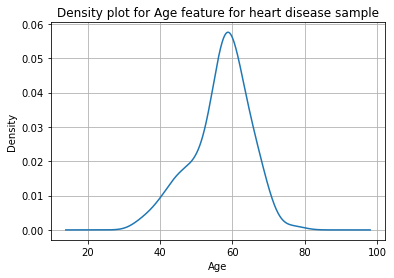

In [ ]:
# plot distribution age feature for sample with num = 1 ( with heart disease)
heart_disease_sample[ 'Age' ].plot.density(grid=True)
plt.title( 'Density plot for Age feature for heart disease sample' )
plt.xlabel( 'Age' )
plt.show()

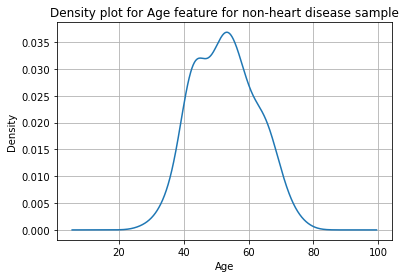

In [ ]:
# plot distribution age feature for sample with  num = 0  ( without heart disease)
non_heart_disease_sample[ 'Age' ].plot.density(grid=True)
plt.title( 'Density plot for Age feature for non-heart disease sample' )
plt.xlabel( 'Age' )
plt.show()

We cannot perform the t-test as the heart disease sample in not normally distributed. However, we can combat this problem by choosing another test that does not require the sample to be normally distributed.
An alternative is to use the rank based Mann Whitney rank test

In [ ]:
# Using Mann-Whitney rank test 
mannwhitneyu_results = stats.mannwhitneyu( heart_disease_sample[ 'Age' ], non_heart_disease_sample[ 'Age' ], alternative = 'two-sided' )
print( mannwhitneyu_results )

MannwhitneyuResult(statistic=14003.5, pvalue=3.672541004211365e-05)


We reject the null hypothesis as p-value<0.05 and conclude that the alternative hypothesis is true, i.e $H_{1}:\mu_{age\ of\  heart\ disease\ patients}\neq \mu_{age\ of\ normal\ patients}$


**Thus, there is significant difference in the age of patients who have heart disease and those who do not.**

**2. Identify if women are significantly more likely to get heart disease than men?**

num   0    1
Sex         
0.0  71   25
1.0  89  112


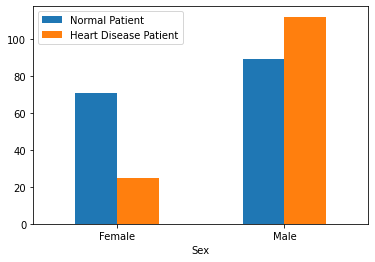

In [ ]:
# creating matrix between features `Sex` and `num`(heart disease feature)
feature_matrix = pd.crosstab( data[ 'Sex' ], data[ 'num' ] )
print( feature_matrix )

# plotting feature_matrix between 'Sex' and 'num'
feature_matrix.plot( kind = 'bar', rot=0 )
plt.xticks(  ( 0.0, 1.0 ), ( 'Female', 'Male' ) )
L = plt.legend()
L.get_texts()[1].set_text( 'Heart Disease Patient' )
L.get_texts()[0].set_text( 'Normal Patient' )

We conclude from the plot that women are **less likely** to have heart disease than men.

**3. Inform yourself about χ²−test. And using χ²−test, identify if there is a
significant association between exercise induced angina (exang), and the
slope of the peak exercise ST segment (slope)?**

In [ ]:
# creating matrix between features - 'exang' and 'slope'
feature_matrix = pd.crosstab( data[ 'exang' ], data[ 'slope' ] )
print( feature_matrix )

slope  1.0  2.0  3.0
exang               
0.0    113   75   12
1.0     26   62    9


In [ ]:
# performing chi2 test of independence
chi2_results = stats.chi2_contingency( feature_matrix )
print( 'Chi-square value: ', chi2_results[0] )
print( 'p-value: ', chi2_results[1] )
print( 'degree of freedom: ', chi2_results[2] )
print( 'expected values: ', chi2_results[3] )

Chi-square value:  23.183106158398047
p-value:  9.243840878417745e-06
degree of freedom:  2
expected values:  [[93.6026936  92.25589226 14.14141414]
 [45.3973064  44.74410774  6.85858586]]


The p-value is less than 0.05, therefore null hypothesis is rejected. The 'exang' and 'slope' are dependant and there is significant association between the two features.